In [68]:
!pip install seaborn
import pandas as pd
import itertools
import string
import numpy as np  # Fixed incorrect import
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split  # Fixed function name
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_rows', None)



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
df = pd.read_csv(r'C:\Users\abhay\Downloads\drugsComTest.tsv', sep='\t')

In [3]:
df.head()

Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  
0   February 28, 2012           22  
1        May 17, 2009           17  
2  September 29, 2017            3  
3       March 5, 2017           35  
4    October 22, 2015            4

In [4]:
df.condition.value_counts()

condition
Birth Control                                                     9648
Depression                                                        3095
Pain                                                              2100
Anxiety                                                           1908
Acne                                                              1847
Bipolar Disorde                                                   1380
Weight Loss                                                       1248
Insomnia                                                          1231
Obesity                                                           1189
ADHD                                                              1126
Emergency Contraception                                            827
Vaginal Yeast Infection                                            811
Diabetes, Type 2                                                   808
High Blood Pressure                                                

In [5]:
df_train =df[(df['condition'] == 'Birth Control') | (df['condition'] =='Depression') | (df['condition'] == 'High Blood Pressure') | (df['condition'] == 'Diabetes, Type 2' )]

In [6]:
df_train.head()

Unnamed: 0           drugName      condition  \
0       163740        Mirtazapine     Depression   
4        97768    Cyclafem 1 / 35  Birth Control   
6       215892             Copper  Birth Control   
9        71428             Levora  Birth Control   
30       79865  Blisovi Fe 1 / 20  Birth Control   

                                               review  rating  \
0   "I&#039;ve tried a few antidepressants over th...    10.0   
4   "I have been on this birth control for one cyc...     9.0   
6   "I&#039;ve had the copper coil for about 3 mon...     6.0   
9   "I was on this pill for almost two years. It d...     2.0   
30  "I absolutely love this product and recommend ...    10.0   

                 date  usefulCount  
0   February 28, 2012           22  
4    October 22, 2015            4  
6        June 6, 2016            1  
9      April 16, 2011            3  
30   November 3, 2017            4

In [7]:
df.shape

(53766, 7)

In [8]:
df_train.shape


(14334, 7)

In [9]:
X = df_train.drop(['Unnamed: 0', 'drugName', 'rating', 'date', 'usefulCount'], axis=1, errors='ignore')

In [10]:
X.head()

condition                                             review
0      Depression  "I&#039;ve tried a few antidepressants over th...
4   Birth Control  "I have been on this birth control for one cyc...
6   Birth Control  "I&#039;ve had the copper coil for about 3 mon...
9   Birth Control  "I was on this pill for almost two years. It d...
30  Birth Control  "I absolutely love this product and recommend ...

In [11]:
X.condition.value_counts()

condition
Birth Control          9648
Depression             3095
Diabetes, Type 2        808
High Blood Pressure     783
Name: count, dtype: int64

In [12]:
X.head()

condition                                             review
0      Depression  "I&#039;ve tried a few antidepressants over th...
4   Birth Control  "I have been on this birth control for one cyc...
6   Birth Control  "I&#039;ve had the copper coil for about 3 mon...
9   Birth Control  "I was on this pill for almost two years. It d...
30  Birth Control  "I absolutely love this product and recommend ...

In [13]:
X_birth =X[(X['condition'] == 'Birth Control')]

In [14]:
X_dep = X[(X['condition'] =='Depression')]

In [15]:
X_bp =X[(X['condition'] =='High Blood Pressure')]

In [16]:
X_diab=X[(X['condition']=='Diabetes, Type 2')]


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


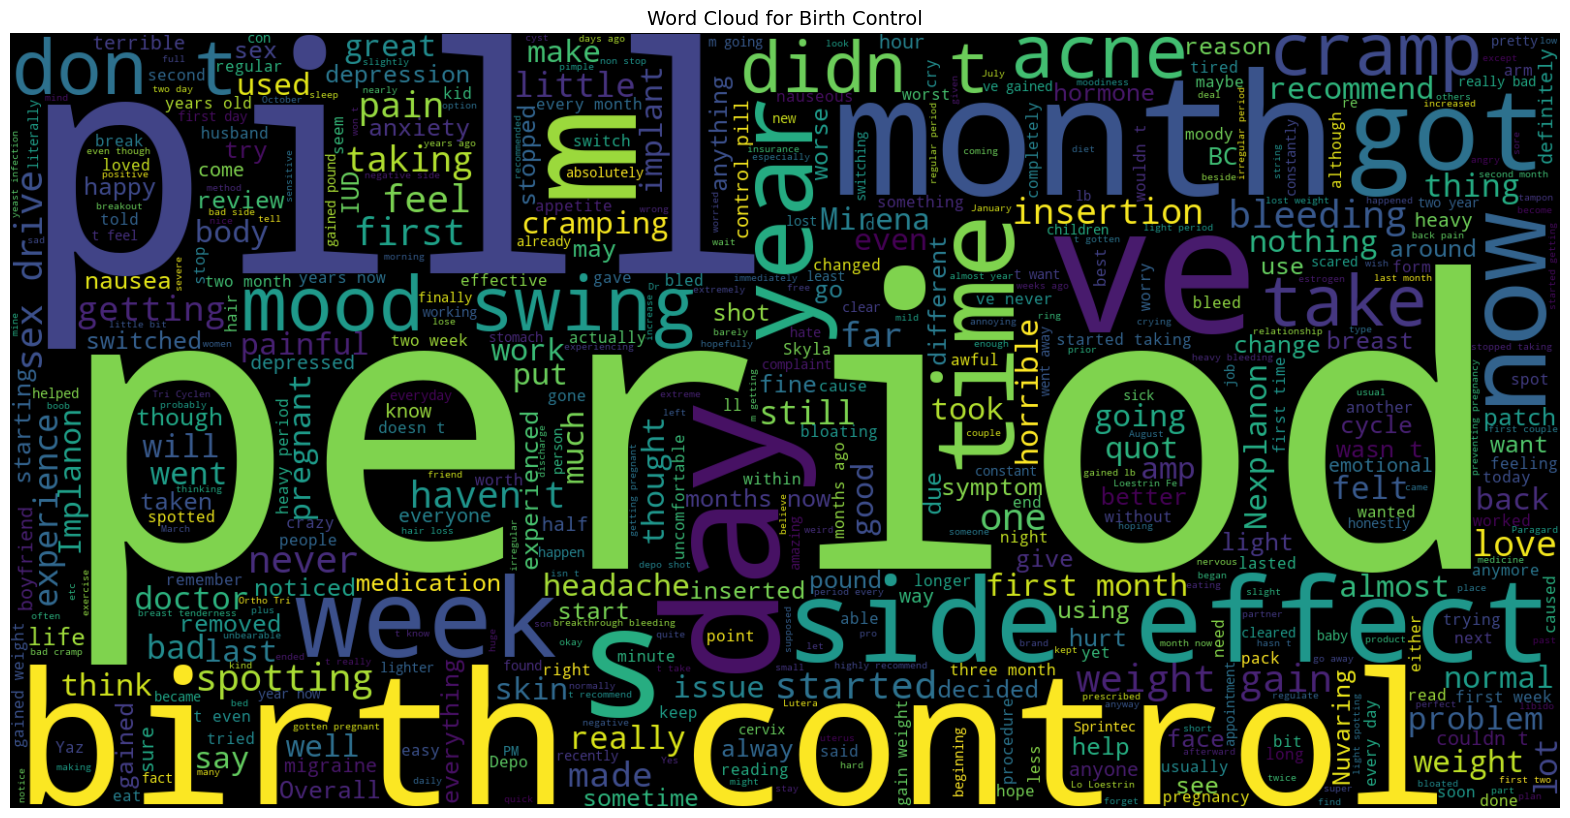

In [17]:
!pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_birth['review']))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Hide axes for better visualization
plt.title('Word Cloud for Birth Control', fontsize=14)
plt.show()

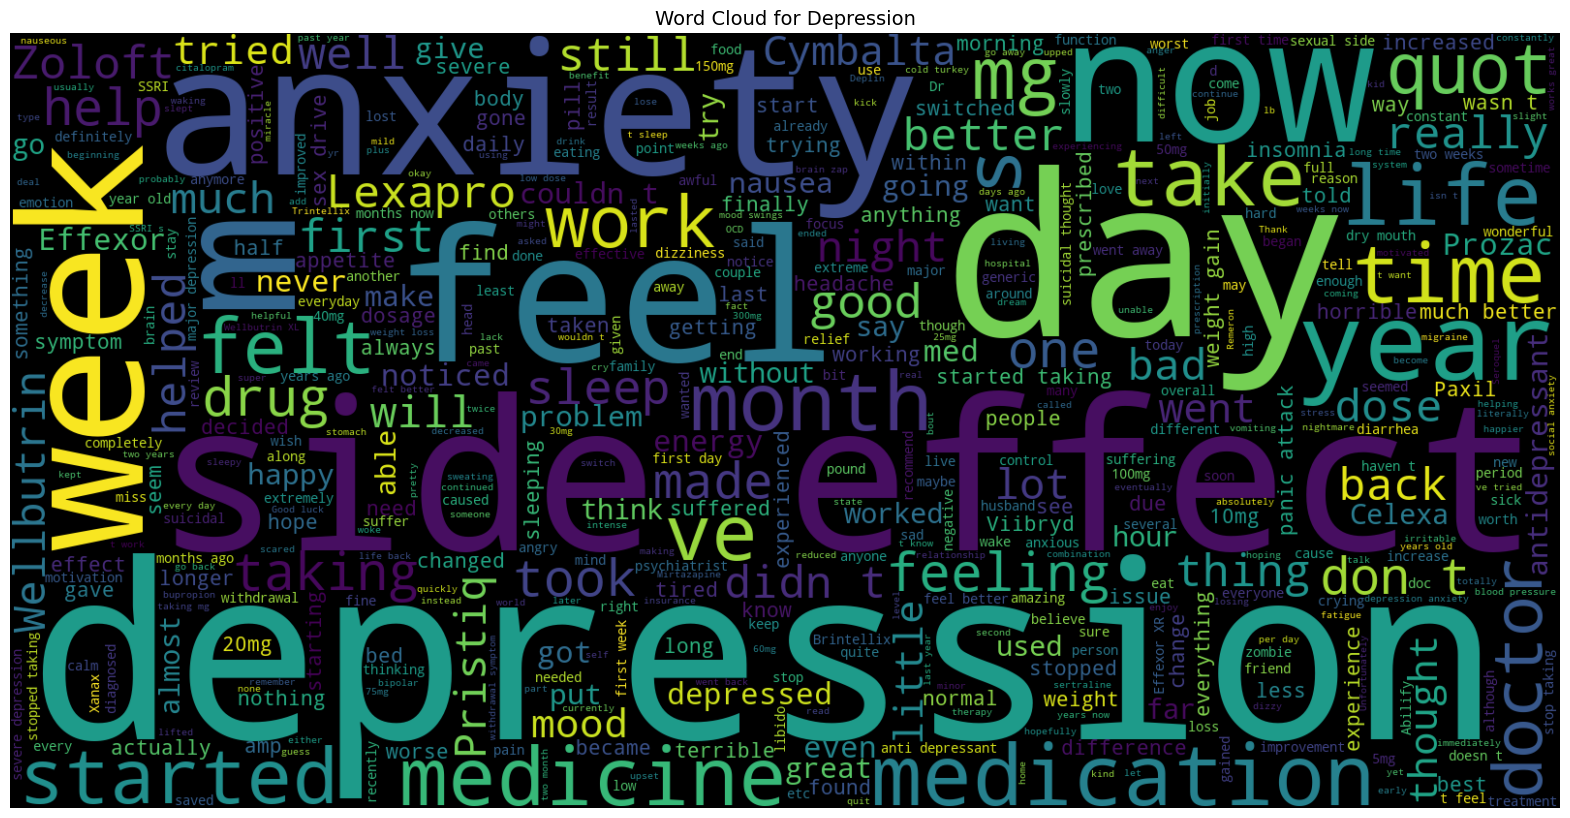

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_dep['review']))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Hide axes for better visualization
plt.title('Word Cloud for Depression', fontsize=14)
plt.show()

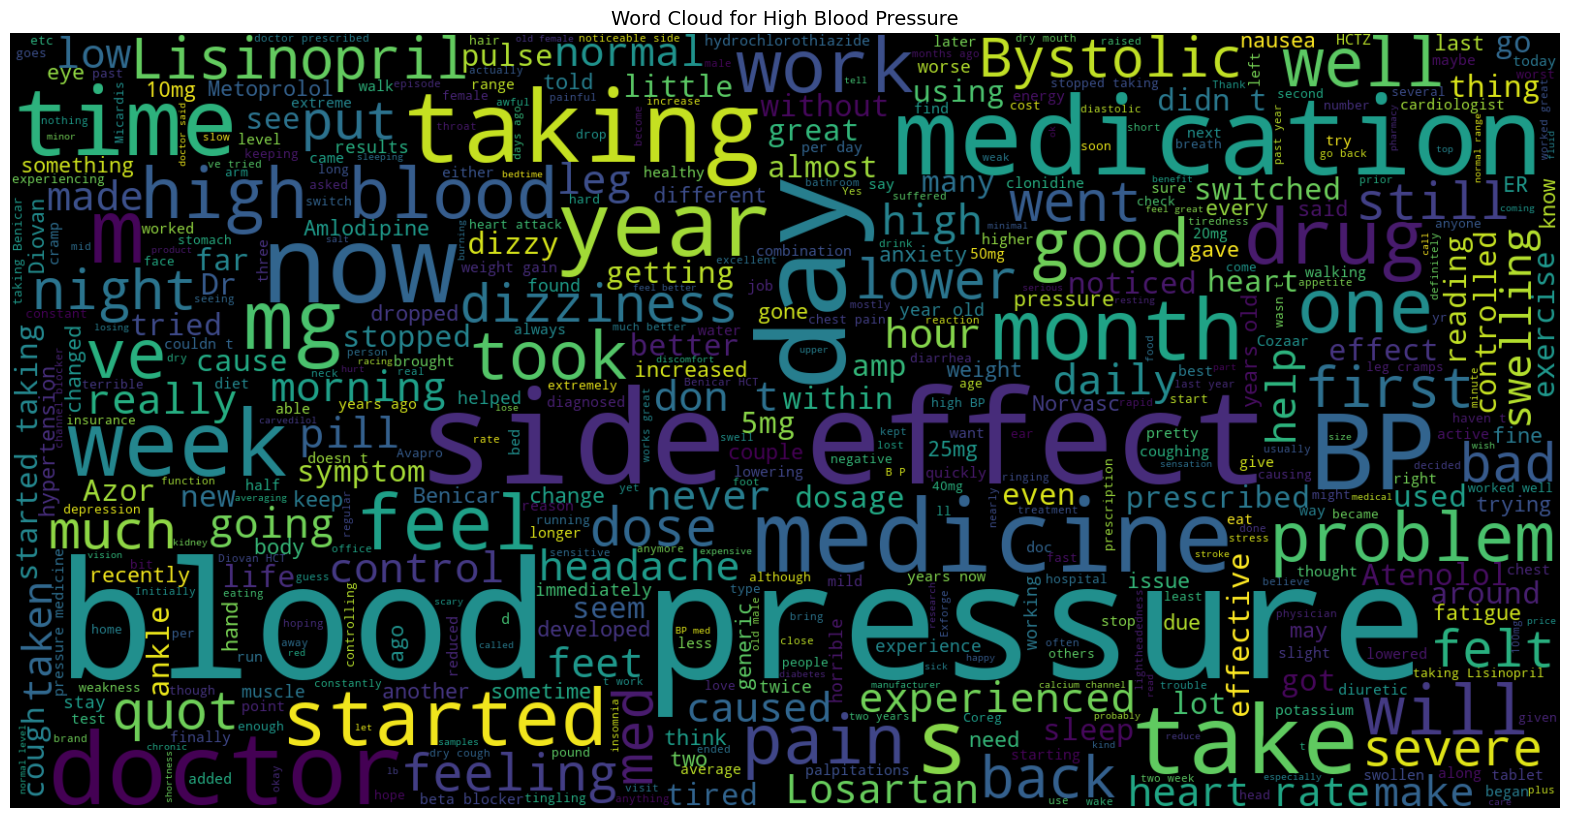

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_bp['review']))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Hide axes for better visualization
plt.title('Word Cloud for High Blood Pressure', fontsize=14)
plt.show()

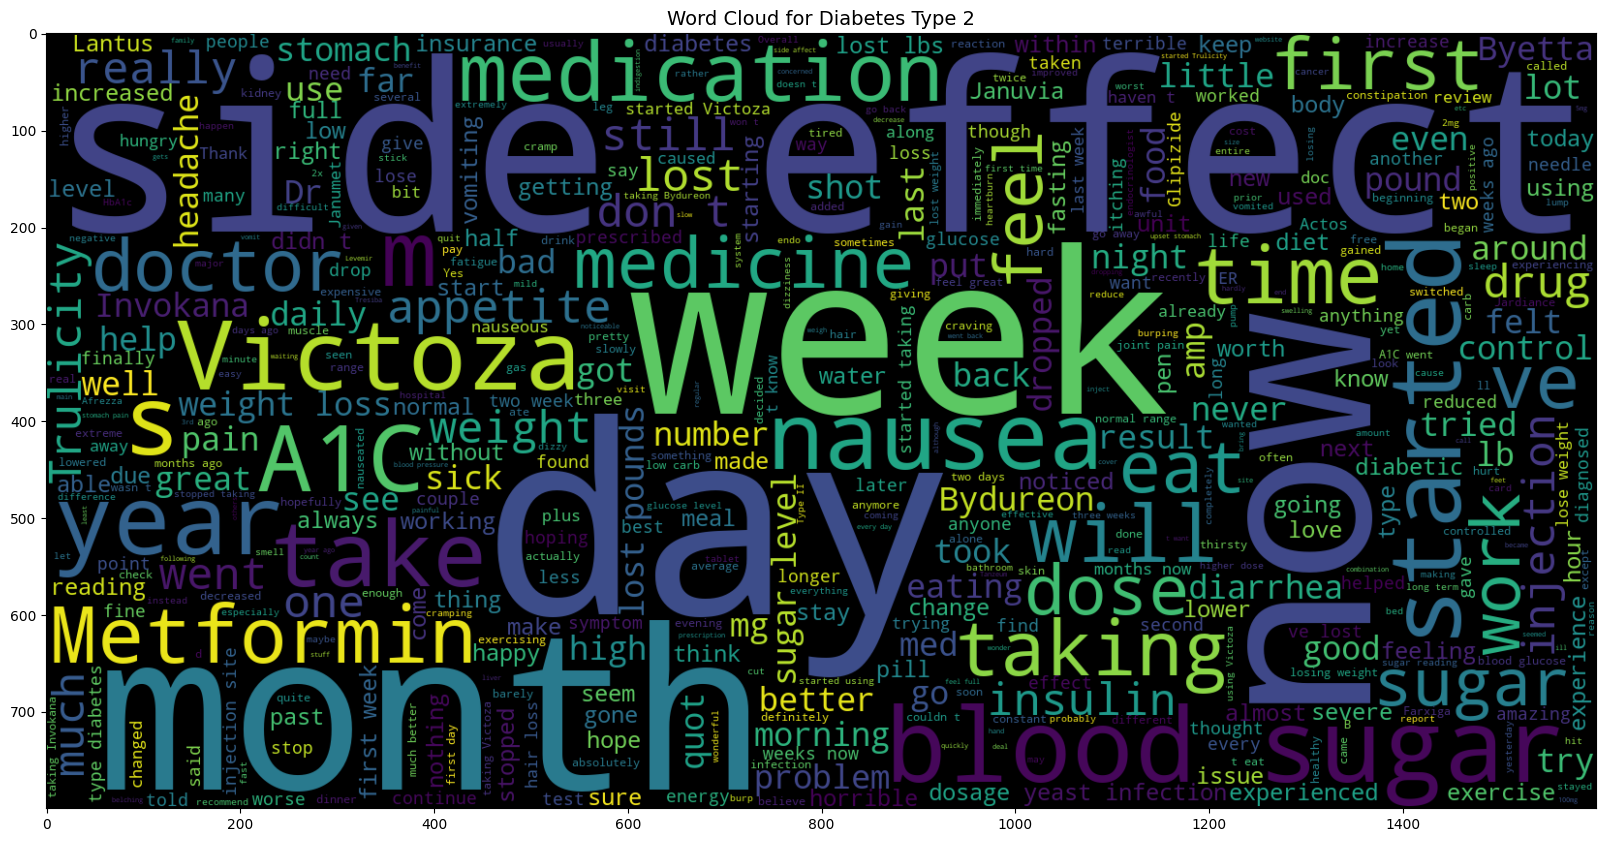

In [20]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_diab['review']))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Diabetes Type 2', fontsize=14)
plt.show()


In [21]:
for i,col in enumerate(X.columns):
    X.iloc[:,i]= X.iloc[:,i].str.replace('"','')

In [37]:
import pandas as pd

pd.set_option('max_colwidth', None)

In [38]:
X.head()

condition  \
0      Depression   
4   Birth Control   
6   Birth Control   
9   Birth Control   
30  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review  \
0                                                                                                                                                                                                                                                                                                                                      I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.   
4   I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out of 10 as I have not been on it long enough for a 10. So far I love this birth control! My side effects have been so minimal its like Im not even on birth control! I have experienced mild headaches here and there and some nausea but other than that ive been feeling great! I got my period on cue on the third day of the inactive pills and I had no idea it was coming because I had zero pms! My period was very light and I barely had any cramping! I had unprotected sex the first month and obviously didn&#039;t get pregnant so I&#039;m very pleased! Highly recommend   
6                                                                                                                                                I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t belive how painful it was; the doctor did say it is very painful for some. Well 3 months in, my periods last 11 days and I&#039;m in pain for about 15 days with random twangs especially in the left side and I&#039;m considering whether I want to put up with the intense pain and heavy periods. I&#039;d recommend this 100% to somebody who doesn&#039;t already have heavy painful periods but right now it just isn&#039;t for me   
9                                                                                                                                                                                                                                                                                                       I was on this pill for almost two years. It does work as far as not getting pregnant however my experience at first was it didn&#039;t make a huge difference then 6 or 7 months into it my sex drive went down, along with being very very dry, my moodiness increased drastically. I would cry one second and then get angry with my husband over anything and everything. My skin has gotten a lot worse, I broke out in places I never had in the last week. So now I am on Yaz.   
30                                       

In [39]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load English stopwords
stop = stopwords.words('english')

print(stop[:10])  


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
porter= PorterStemmer()


In [41]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("Trouble"))

sportingli
veri
troubl


In [42]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet if not already downloaded
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
print(lemmatizer.lemmatize("sportingly"))  # Output: sportingly (no change, since it's an adverb)
print(lemmatizer.lemmatize("very"))        # Output: very (no change, since it's an adverb)
print(lemmatizer.lemmatize("Trouble"))     # Output: Trouble (no change, as default POS is 'noun')

sportingly
very
Trouble


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
from bs4 import BeautifulSoup
import re

In [44]:
def review_to_words(raw_review):
    review_text =BeautifulSoup(raw_review,'html.parser').get_text()
    letters_only= re.sub('[^a-zA-Z]',' ', review_text)
    words = letters_only.lower().split()
    meaningful_words= [w for w in words if not w in stop]
    lemmitize_words =[lemmatizer.lemmatize(w) for w in meaningful_words]
    return(' '.join(lemmitize_words))

In [45]:
X['review_clean']= X['review'].apply(review_to_words)

C:\Users\abhay\AppData\Local\Temp\ipykernel_23328\261663823.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text =BeautifulSoup(raw_review,'html.parser').get_text()


In [46]:
X.head()

condition  \
0      Depression   
4   Birth Control   
6   Birth Control   
9   Birth Control   
30  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review  \
0                                                                                                                                                                                                                                                                                                                                      I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.   
4   I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out of 10 as I have not been on it long enough for a 10. So far I love this birth control! My side effects have been so minimal its like Im not even on birth control! I have experienced mild headaches here and there and some nausea but other than that ive been feeling great! I got my period on cue on the third day of the inactive pills and I had no idea it was coming because I had zero pms! My period was very light and I barely had any cramping! I had unprotected sex the first month and obviously didn&#039;t get pregnant so I&#039;m very pleased! Highly recommend   
6                                                                                                                                                I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t belive how painful it was; the doctor did say it is very painful for some. Well 3 months in, my periods last 11 days and I&#039;m in pain for about 15 days with random twangs especially in the left side and I&#039;m considering whether I want to put up with the intense pain and heavy periods. I&#039;d recommend this 100% to somebody who doesn&#039;t already have heavy painful periods but right now it just isn&#039;t for me   
9                                                                                                                                                                                                                                                                                                       I was on this pill for almost two years. It does work as far as not getting pregnant however my experience at first was it didn&#039;t make a huge difference then 6 or 7 months into it my sex drive went down, along with being very very dry, my moodiness increased drastically. I would cry one second and then get angry with my husband over anything and everything. My skin has gotten a lot worse, I broke out in places I never had in the last week. So now I am on Yaz.   
30                                       

In [47]:
X_feat =X['review_clean']
y=X['condition']

In [48]:
X_train,X_test,y_train,y_test= train_test_split(X_feat,y,stratify=y,test_size=0.2,random_state =0)

In [49]:
count_vectorizer = CountVectorizer(stop_words ='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [50]:
count_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 365349 stored elements and shape (11467, 11056)>

Accuracy: 0.971


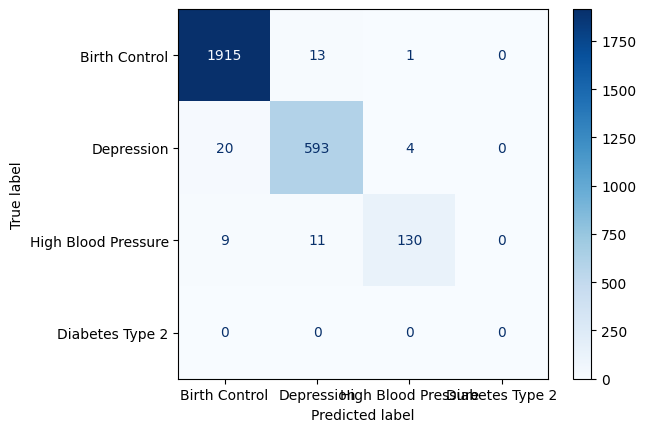

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Train and predict
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)

# Accuracy score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

# Confusion matrix and plot
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'High Blood Pressure', 'Diabetes Type 2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Birth Control', 'Depression', 'High Blood Pressure', 'Diabetes Type 2'])
disp.plot(cmap='Blues')  # You can change the colormap if desired
plt.show()

Accuracy: 0.960


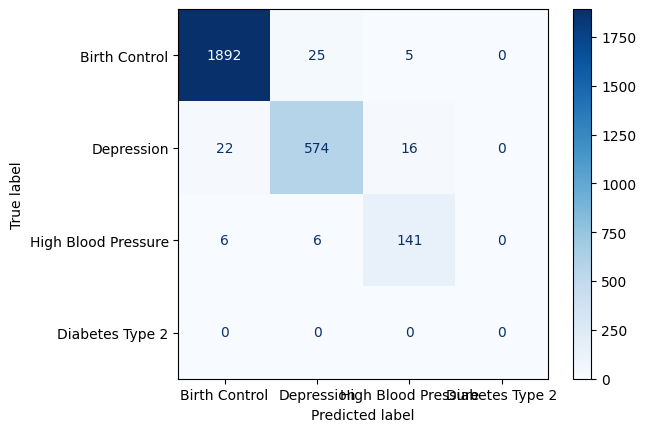

In [54]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Train and predict with PassiveAggressiveClassifier
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)

# Accuracy score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

# Confusion matrix and plot
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'High Blood Pressure', 'Diabetes Type 2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Birth Control', 'Depression', 'High Blood Pressure', 'Diabetes Type 2'])
disp.plot(cmap='Blues')
plt.show()

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Transform the training and testing data
tfidf_train_2 = tfidf.fit_transform(X_train)
tfidf_test_2 = tfidf.transform(X_test)

Accuracy: 0.861


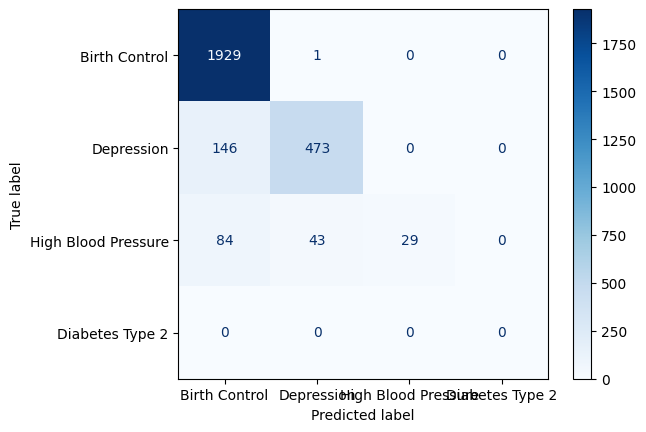

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Train and predict
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)

# Accuracy score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

# Confusion matrix and plot
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'High Blood Pressure', 'Diabetes Type 2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Birth Control', 'Depression', 'High Blood Pressure', 'Diabetes Type 2'])
disp.plot(cmap='Blues')
plt.show()

In [116]:
 print(test.shape)

(1, 11056)


Accuracy: 0.971


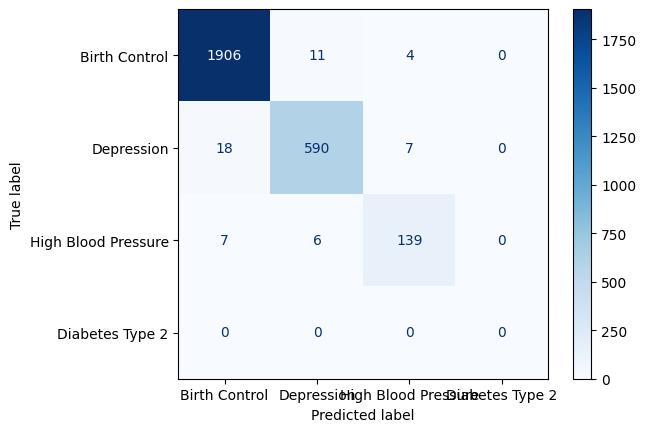

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Train and predict using PassiveAggressiveClassifier
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)

# Accuracy score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

# Confusion matrix and plot
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'High Blood Pressure', 'Diabetes Type 2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Birth Control', 'Depression', 'High Blood Pressure', 'Diabetes Type 2'])
disp.plot(cmap='Blues')
plt.show()

Accuracy: 0.972


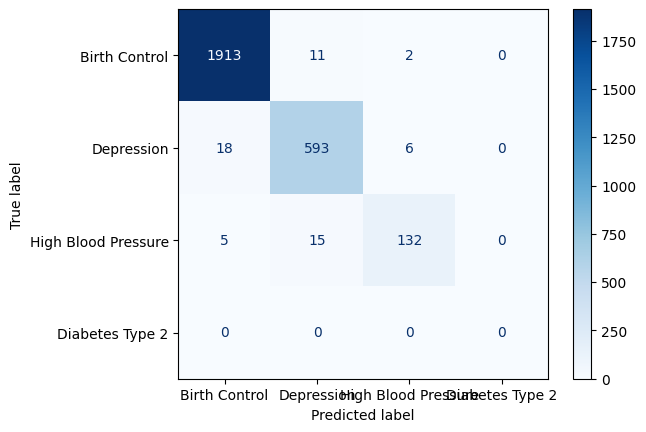

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# TF-IDF Vectorizer with n-grams (1 to 3)
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1, 3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

# Train and predict using PassiveAggressiveClassifier
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)

# Accuracy score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

# Confusion matrix and plot
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'High Blood Pressure', 'Diabetes Type 2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Birth Control', 'Depression', 'High Blood Pressure', 'Diabetes Type 2'])
disp.plot(cmap='Blues')
plt.show()

In [83]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()  # Updated to get_feature_names_out() for newer versions of sklearn
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(f"{classlabel}: {feat} ({coef:.4f})")

most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')

Birth Control: absolutely (0.3747)
Birth Control: offset (0.3819)
Birth Control: cancelling (0.3849)
Birth Control: imma (0.4116)
Birth Control: etonogestrel (0.4176)
Birth Control: living (0.4594)
Birth Control: primarily (0.4646)
Birth Control: losetrin (0.4802)
Birth Control: bpd (0.7178)
Birth Control: detrimental (5.2765)


In [89]:


most_informative_feature_for_class(tfidf_vectorizer,pass_tf,'High Blood Pressure')

High Blood Pressure: backside (0.3895)
High Blood Pressure: backsliding (0.3895)
High Blood Pressure: daw (0.4136)
High Blood Pressure: dawn (0.4136)
High Blood Pressure: monanessa (0.4234)
High Blood Pressure: arsenal (0.4675)
High Blood Pressure: demeanor (0.5188)
High Blood Pressure: court (0.6428)
High Blood Pressure: coupon (0.7084)
High Blood Pressure: delivered (0.7956)


In [87]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,'Diabetes, Type 2')

Diabetes, Type 2: pp (0.3003)
Diabetes, Type 2: toast (0.3806)
Diabetes, Type 2: safest (0.3957)
Diabetes, Type 2: sedating (0.4308)
Diabetes, Type 2: rad (0.4463)
Diabetes, Type 2: tmj (0.4841)
Diabetes, Type 2: jitteriness (0.5307)
Diabetes, Type 2: jinxing (0.6762)
Diabetes, Type 2: sedated (1.0147)
Diabetes, Type 2: jean (1.6541)


In [128]:
X.head()

condition  \
0      Depression   
4   Birth Control   
6   Birth Control   
9   Birth Control   
30  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review  \
0                                                                                                                                                                                                                                                                                                                                      I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.   
4   I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out of 10 as I have not been on it long enough for a 10. So far I love this birth control! My side effects have been so minimal its like Im not even on birth control! I have experienced mild headaches here and there and some nausea but other than that ive been feeling great! I got my period on cue on the third day of the inactive pills and I had no idea it was coming because I had zero pms! My period was very light and I barely had any cramping! I had unprotected sex the first month and obviously didn&#039;t get pregnant so I&#039;m very pleased! Highly recommend   
6                                                                                                                                                I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t belive how painful it was; the doctor did say it is very painful for some. Well 3 months in, my periods last 11 days and I&#039;m in pain for about 15 days with random twangs especially in the left side and I&#039;m considering whether I want to put up with the intense pain and heavy periods. I&#039;d recommend this 100% to somebody who doesn&#039;t already have heavy painful periods but right now it just isn&#039;t for me   
9                                                                                                                                                                                                                                                                                                       I was on this pill for almost two years. It does work as far as not getting pregnant however my experience at first was it didn&#039;t make a huge difference then 6 or 7 months into it my sex drive went down, along with being very very dry, my moodiness increased drastically. I would cry one second and then get angry with my husband over anything and everything. My skin has gotten a lot worse, I broke out in places I never had in the last week. So now I am on Yaz.   
30                                       

In [102]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,'Depression')

Depression: prbly (0.5659)
Depression: arthritis (0.5730)
Depression: somber (0.6016)
Depression: neurontin (0.6177)
Depression: allowed (0.7000)
Depression: spam (0.7651)
Depression: knock (0.8451)
Depression: spiked (0.8877)
Depression: amylase (1.0090)
Depression: advance (2.6666)


In [122]:
import joblib

# Saving the trained vectorizer and classifier
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(pass_tf, 'pass_tf_model.pkl')

# Loading for prediction
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
pass_tf = joblib.load('pass_tf_model.pkl')

# Now use them for prediction
text = ["I started taking Apri about 7 months ago. My breasts got noticeably larger..."]
test = tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
print(f"Predicted class: {pred1}")


Predicted class: Birth Control


In [110]:
 print(test.shape)

(1, 11056)


In [125]:
text =["I started taking Apri about 7 months ago. My breats got noticeably larger within the first few weeks and I gained about 10 pounds, but I&#039;m a thin girl anyway so I gladly take on the extra few pounds and curves. I got prescribed this birth control because of my ovarian cysts and since I have not had any problems with them. They&#039;ve been unnoticeable and my cramps don&#039;t even exist anymore. I love Apri and it&#039;s affordable. Just what I need in this economic clash."]
test =tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
str(pred1)


'Birth Control'

In [108]:
print(f"Training Vectorizer Vocabulary Size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"Test Vectorizer Vocabulary Size: {len(tfidf_vectorizer.transform(text).toarray().flatten())}")

Training Vectorizer Vocabulary Size: 11056
Test Vectorizer Vocabulary Size: 11056


In [129]:
text =["I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me."]
test =tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
str(pred1)


'Depression'